In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("telco_customer_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,cust_0,Male,0,Yes,Yes,63,Yes,No,No,No internet service,No internet service,Yes,No internet service,No,Yes,One year,No,Mailed check,53.57,8131.42,No
1,cust_1,Female,1,Yes,Yes,12,Yes,No,No,Yes,No,No internet service,No internet service,No,No internet service,Month-to-month,Yes,Mailed check,99.39,655.05,No
2,cust_2,Male,0,No,No,11,Yes,No,No,No internet service,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,56.00,7201.27,No
3,cust_3,Male,0,Yes,Yes,13,Yes,No,No,Yes,No,Yes,Yes,No internet service,Yes,One year,No,Credit card (automatic),104.86,3069.05,No
4,cust_4,Male,0,Yes,Yes,35,Yes,Yes,No,Yes,Yes,No internet service,Yes,No,No internet service,Month-to-month,No,Credit card (automatic),64.44,7534.50,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.197501,36.207582,69.506754,4378.700491
std,0.398142,20.683769,29.783318,2433.405173
min,0.000000,1.000000,18.020000,216.850000
25%,0.000000,18.000000,43.375000,2235.680000
50%,0.000000,36.000000,69.790000,4388.670000
75%,0.000000,54.000000,95.910000,6473.675000
max,1.000000,72.000000,119.990000,8639.930000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.724407
Yes    0.275593
Name: proportion, dtype: float64

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].isnull().sum()


np.int64(0)

In [13]:
df = df.drop("customerID", axis=1)


In [15]:
# visual EDA

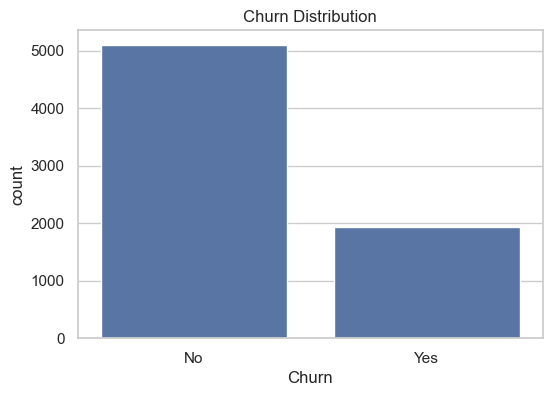

In [17]:
#churn count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


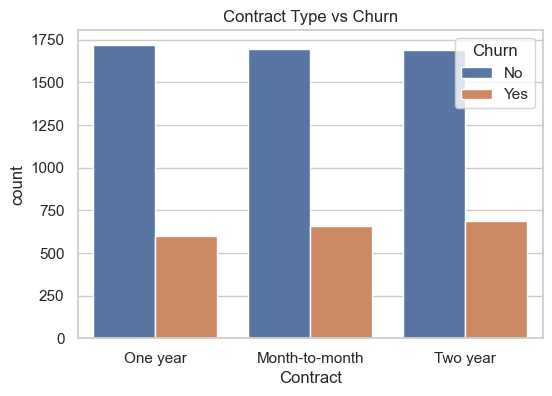

In [19]:
# contract type vs chrun
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Type vs Churn")
plt.show()


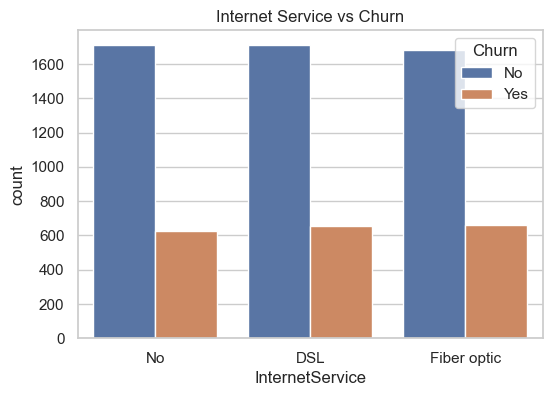

In [21]:
# internet service vs churn 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Internet Service vs Churn")
plt.show()


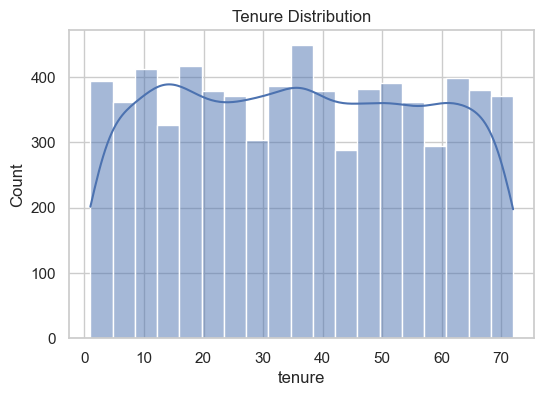

In [23]:
# tenure distrubation

plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()


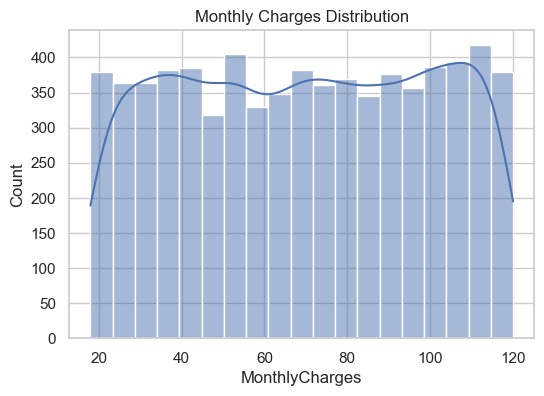

In [25]:
# montly charges distrubation
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


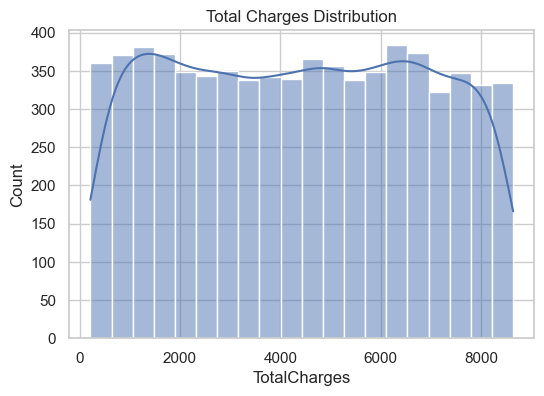

In [28]:
# total charges distrubution
plt.figure(figsize=(6,4))
sns.histplot(df['TotalCharges'], kde=True)
plt.title("Total Charges Distribution")
plt.show()


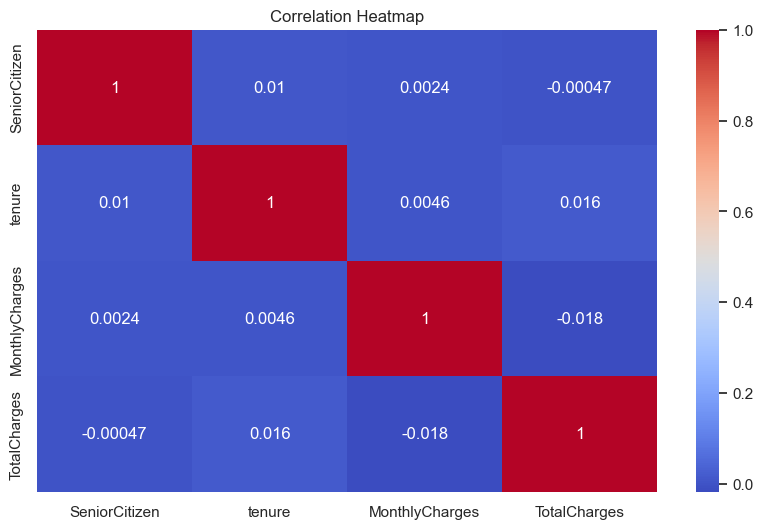

In [35]:
# correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
